In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fontsize_legend = 20
fontsize_axes = 24
fontsize_ticks = 16
linewidth_all = 3
markersize_all = 8
size_extra = 4

figsize_whole = (6,5)
figsize_three = (15,5)
figsize_three_vert = (6, 13)
figsize_two = (10,5)
folder_out = 'figures_paper'

color_2folds = 'palevioletred'
color_3folds = 'firebrick'
color_4folds = 'steelblue'

def rescale_eigenvalue(eigenvalues_cur):
    return np.sign(eigenvalues_cur) * np.sqrt(np.abs(eigenvalues_cur)) * 1/(2*np.pi)

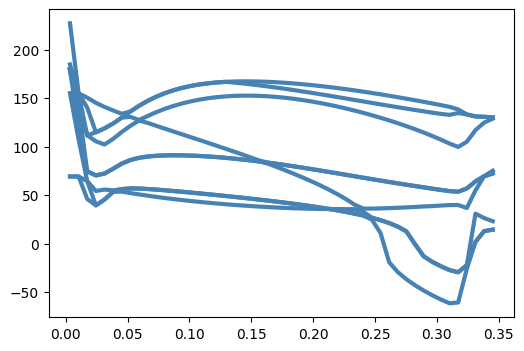

In [3]:
fig, ax = plt.subplots(figsize = (6,4))

'''4 folds freq'''
idx_4 = 265
nu = 0.5
idx_plot = 2
color_4folds = 'steelblue'

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = rescale_eigenvalue(freq_all[:,j])
    # ax[idx_plot].plot(-3*temp_all, freq_rescale, 'o', color = color_plot, markersize = markersize_all)
    if j == 0:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)


# ylim_cur = ax.get_ylim()
# f = lambda x: np.interp(x,-3*temp_all,freq_all[:,0])
# sol_root = root(f,0.25)
# ax.vlines(float(sol_root.x),ylim_cur[0], ylim_cur[1], 'black', '--', linewidth = linewidth_all, label = '$\lambda = 0$')

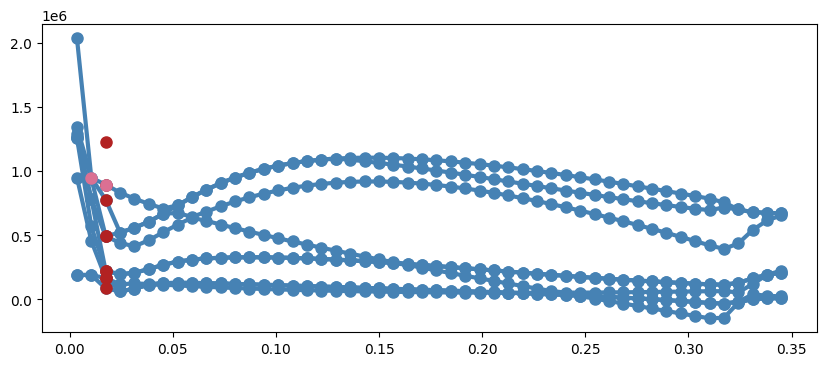

In [4]:
fig, ax = plt.subplots(figsize = (10,4))

'''4 folds freq'''
idx_4 = 265
nu = 0.5
idx_plot = 2
color_4folds = 'steelblue'

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
temp_all = data_cur[:,0]
freq_all = data_cur[:,1:]

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = freq_all[:,j]
    ax.plot(-3*temp_all, freq_rescale, 'o', color = color_4folds, markersize = markersize_all)
    if j == 0:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)

idx_highlight = 2
j_highlight = 8
ax.plot(np.tile(-3*temp_all[idx_highlight], 10), freq_all[idx_highlight,:], 'o', color = 'firebrick', markersize = markersize_all)
ax.plot(-3*temp_all[idx_highlight], freq_all[idx_highlight,j_highlight], 'o', color = 'palevioletred', markersize = markersize_all)
ax.plot(-3*temp_all[idx_highlight-1], freq_all[idx_highlight-1,j_highlight], 'o', color = 'palevioletred', markersize = markersize_all)

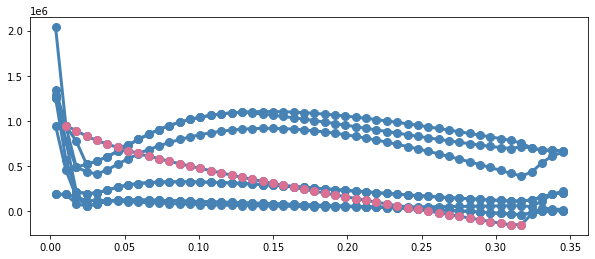

In [79]:
fig, ax = plt.subplots(figsize = (10,4))

for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = freq_all[:,j]
    ax.plot(-3*temp_all, freq_rescale, 'o', color = color_4folds, markersize = markersize_all)
    if j == 0:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)

idx_highlight = 2
j_highlight = 8
# ax.plot(np.tile(-3*temp_all[idx_highlight], 10), freq_all[idx_highlight,:], 'o', color = 'firebrick', markersize = markersize_all)
ax.plot(-3*temp_all[idx_highlight], freq_all[idx_highlight,j_highlight], 'o', color = 'palevioletred', markersize = markersize_all)
ax.plot(-3*temp_all[idx_highlight-1], freq_all[idx_highlight-1,j_highlight], 'o', color = 'palevioletred', markersize = markersize_all)

initial_i = [1,2]
initial_j = [8,8]
eps = 100


j_cur = np.array(initial_j)
i_cur = np.array(initial_i)
delta_V = -3*(temp_all[1] - temp_all[0])

num_samp = np.shape(freq_all)[0] - initial_i[-1] - 1 - 4
num_freq = np.shape(freq_all[1])
for idx in range(num_samp):
    i_next = i_cur[-1] + 1
    vals_cur = np.array([freq_all[i,j] for i,j in zip(i_cur, j_cur)])
    slope_prev = np.diff(vals_cur) / delta_V
    val_new_est = vals_cur[-1] + slope_prev*delta_V
    freq_next = freq_all[i_next,:]
    j_next = np.argmin(np.abs(freq_next - val_new_est))
    ax.plot(-3*temp_all[i_next], freq_all[i_next,j_next], 'o', color = 'palevioletred', markersize = markersize_all)
    j_cur = np.array([j_cur[-1], j_next])
    i_cur = i_cur + 1


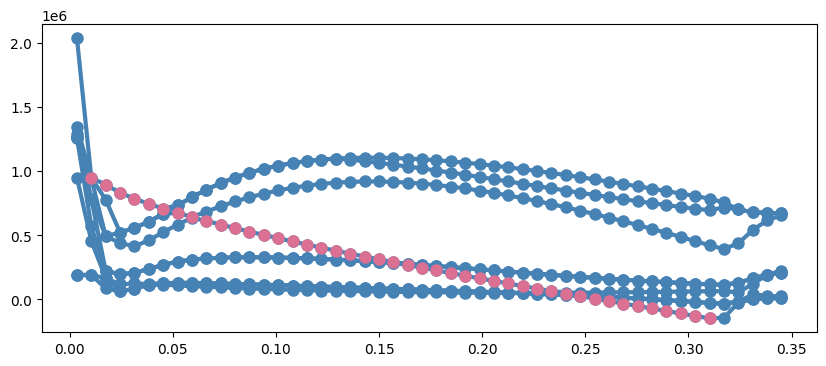

In [41]:
fig, ax = plt.subplots(figsize = (10,4))

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
vol_all = -3*data_cur[:,0]
freq_all = data_cur[:,1:]


for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = freq_all[:,j]
    ax.plot(-3*temp_all, freq_rescale, 'o', color = color_4folds, markersize = markersize_all)
    if j == 0:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all)
    else:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all)


initial_i = [1,2]
initial_j = [8,8]

delta_V = vol_all[1] - vol_all[0]

num_samp = np.shape(freq_all)[0] - initial_i[-1] - 4
num_freq = np.shape(freq_all[1])

j_all = np.zeros(np.shape(freq_all)[0], dtype = int)
i_all = np.arange(np.shape(freq_all)[0])
j_all[1:3] = initial_j
cut_idx = initial_i[0] + np.arange(num_samp)

for idx in range(num_samp):
    i_next = idx + initial_i[1] + 1
    i_cur = [i_next-2,i_next-1]
    j_cur = [j_all[i] for i in i_cur]

    vals_cur = np.array([freq_all[i,j] for i,j in zip(i_cur, j_cur)])
    val_new_est = vals_cur[-1] + np.diff(vals_cur)
    j_all[i_next] = np.argmin(np.abs(freq_all[i_next,:] - val_new_est))
    

ax.plot(vol_all[i_all[cut_idx]], freq_all[i_all[cut_idx],j_all[cut_idx]], 'o', color = 'palevioletred', markersize = markersize_all)

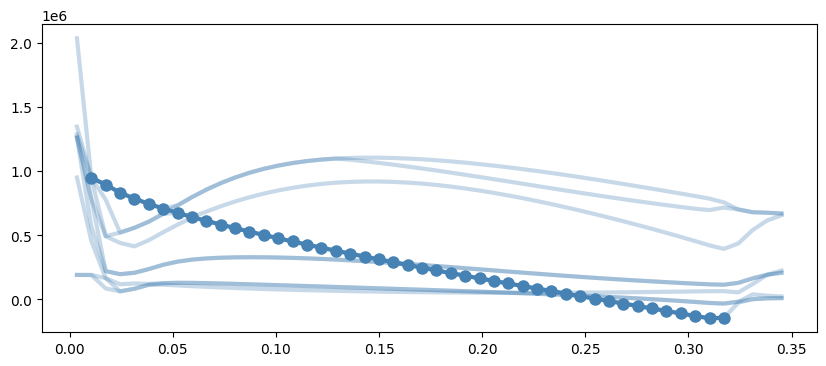

In [57]:
fig, ax = plt.subplots(figsize = (10,4))

data_path = f'data_out/4fold-test_nu-{idx_4}_eig_val.txt'
data_cur = np.loadtxt(data_path)
vol_all = -3*data_cur[:,0]
freq_all = data_cur[:,1:]

initial_i = [1,2]
initial_j = [8,8]



def highlight_mode(freq_all, initial_i, initial_j, num_samp):
    j_all = np.zeros(np.shape(freq_all)[0], dtype = int)
    i_all = np.arange(np.shape(freq_all)[0], dtype = int)
    j_all[initial_i[0]:initial_i[1] + 1] = initial_j
    cut_idx = initial_i[0] + np.arange(num_samp)

    for idx in range(num_samp):
        i_next = idx + initial_i[1] + 1
        i_cur = [i_next-2,i_next-1]
        j_cur = [j_all[i] for i in i_cur]

        vals_cur = np.array([freq_all[i,j] for i,j in zip(i_cur, j_cur)])
        val_new_est = vals_cur[-1] + np.diff(vals_cur)
        j_all[i_next] = np.argmin(np.abs(freq_all[i_next,:] - val_new_est))
    return (i_all, j_all, cut_idx)

alpha_val = 0.3
for j in range(np.shape(freq_all)[1]-1):
    freq_rescale = freq_all[:,j]
    # ax.plot(-3*temp_all, freq_rescale, 'o', color = color_4folds, markersize = markersize_all)
    if j == 0:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, label = rf'$\nu$ = {nu}', linewidth = linewidth_all, alpha = alpha_val)
    else:
        ax.plot(-3*temp_all, freq_rescale, '-', color = color_4folds, linewidth = linewidth_all, alpha = alpha_val)

num_samp = np.shape(freq_all)[0] - initial_i[-1] - 3
i_all, j_all, cut_idx = highlight_mode(freq_all, initial_i, initial_j, num_samp)


ax.plot(vol_all[i_all[cut_idx]], freq_all[i_all[cut_idx],j_all[cut_idx]], '-o', color = color_4folds,
        markersize = markersize_all, linewidth = linewidth_all)

In [58]:
j_all

array([0, 8, 8, 8, 8, 8, 8, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0])